In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 
import xarray as xr
import scipy.io as sio
import datetime as dt

In [5]:
# formatting for plots

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

For comparison with Sentinel-1 C-band SAR (12-day repeat obs., 30m spatial resolution, 7am and 7pm overpass times)

I want to see if I can see wet snow start to appear on **April 21, 2020** on the western mesa, and if by **May 3, 2020** we see the snow fully ripening and starting to melt?

Created GOES-16 timeseries for April and May 2020 on the western mesa (around Snow Pit 2S10):

`python ./goes-timeseries.py -d /storage/GOES/goes16/2020/04 -c C14 -l 39.0195 -108.1923 3043 -o SnowPit2S10_GOES-16_C14_timeseries_Apr2020.pkl`

`python ./goes-timeseries.py -d /storage/GOES/goes16/2020/05 -c C14 -l 39.0195 -108.1923 3043 -o SnowPit2S10_GOES-16_C14_timeseries_May2020.pkl`

---

Read in GOES ABI, Band 14 brightness temperature timeseries:

In [51]:
# Read files
g16_c14_feb = pd.read_pickle('data/GOES_timeseries/SnowPit2S10_GOES-16_timeseries_Feb2020.pkl')
g16_c14_mar = pd.read_pickle('data/GOES_timeseries/SnowPit2S10_GOES-16_C14_timeseries_Mar2020.pkl')
g16_c14_apr = pd.read_pickle('data/GOES_timeseries/SnowPit2S10_GOES-16_C14_timeseries_Apr2020.pkl')
g16_c14_may = pd.read_pickle('data/GOES_timeseries/SnowPit2S10_GOES-16_C14_timeseries_May2020.pkl')

# Convert UTC to UTC-7 (MST) and set index to the datetime
g16_c14_feb.index  = pd.to_datetime(g16_c14_feb.time) - pd.Timedelta(hours=7)
g16_c14_mar.index  = pd.to_datetime(g16_c14_mar.time) - pd.Timedelta(hours=7)
g16_c14_apr.index  = pd.to_datetime(g16_c14_apr.time) - pd.Timedelta(hours=7)
g16_c14_may.index  = pd.to_datetime(g16_c14_may.time) - pd.Timedelta(hours=7)

# concat Apr and May dataframes
g16_c14 = pd.concat([g16_c14_feb, g16_c14_mar, g16_c14_apr, g16_c14_may])

---
### Plot all together:

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


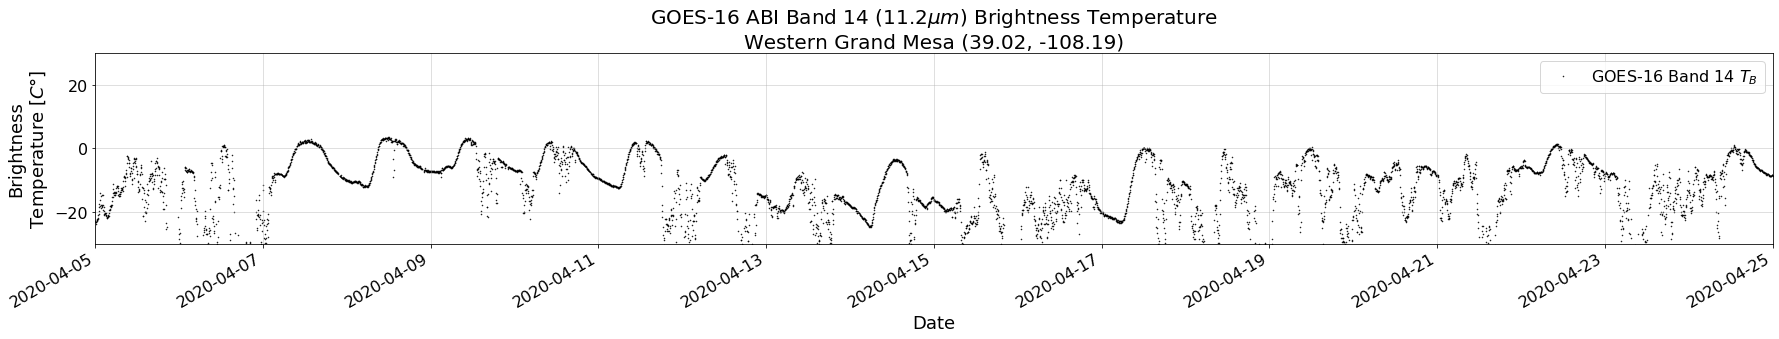

In [62]:
fig, ax = plt.subplots(1,1,figsize=(25,5), tight_layout=True)


startdate = pd.datetime(2020,4,5)
enddate = pd.datetime(2020,4,25)

airborne_color = '#e41a1c'
eco_color = 'red'
ast_color = 'blue'
g16_color = 'k'
g17_color = '#d95f02'
    
# Plot surface temperature and remotely sensed temps
g16_c14.tb.plot(ax=ax, linestyle='none', marker='.', markersize=1, c=g16_color, label='GOES-16 Band 14 $T_B$', zorder=-0)

## Plot vertical lines for Landsat images
#ax.axvline(pd.Timestamp(2020,2,16, 11), color='tab:blue', linestyle='--', label='Landsat-8 Image Times')
#ax.axvline(pd.Timestamp(2020,3,3, 11), color='tab:blue', linestyle='--')
#ax.axvline(pd.Timestamp(2020,3,19, 11), color='tab:blue', linestyle='--')
#ax.axvline(pd.Timestamp(2020,4,4, 11), color='tab:blue', linestyle='--')
#ax.axvline(pd.Timestamp(2020,4,20, 11), color='tab:blue', linestyle='--')
#ax.axvline(pd.Timestamp(2020,5,6, 11), color='tab:blue', linestyle='--')
#ax.axvline(pd.Timestamp(2020,5,22, 11), color='tab:blue', linestyle='--')

ax.set_ylim((-30,30))
ax.set_xlim((startdate,enddate))
ax.set_ylabel('Brightness\nTemperature [$C\degree$]')
ax.set_xlabel('Date')
ax.set_title('GOES-16 ABI Band 14 ($11.2 \mu m$) Brightness Temperature\nWestern Grand Mesa (39.02, -108.19)');

# add legend
ax.legend(loc='best')

 
fig.autofmt_xdate() 

ax.grid(alpha=0.5)


#plt.savefig('april_may_timeline.jpg',dpi=300)

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


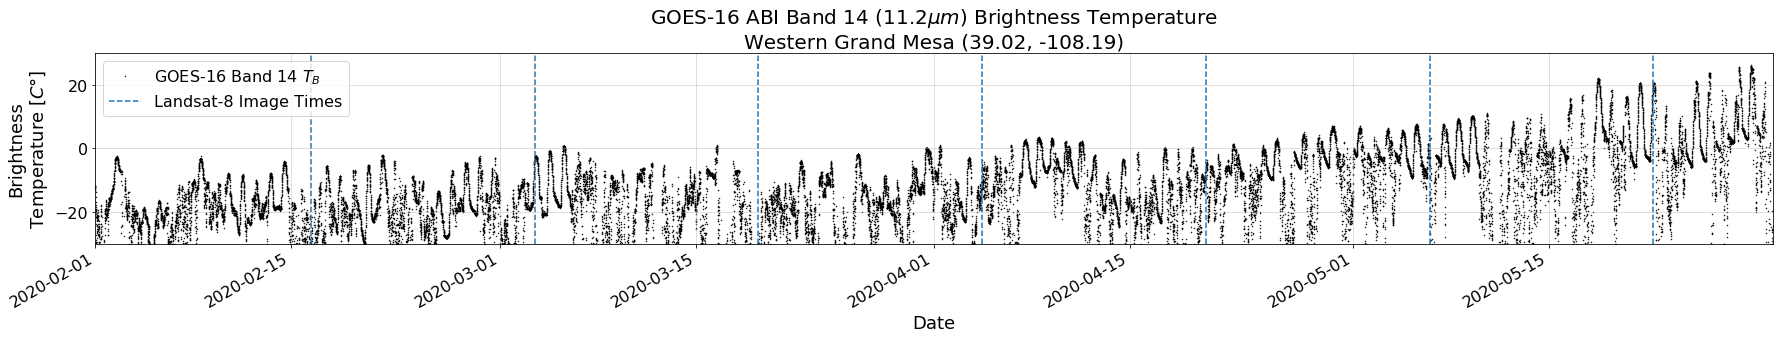

In [61]:
fig, ax = plt.subplots(1,1,figsize=(25,5), tight_layout=True)


startdate = pd.datetime(2020,2,1)
enddate = pd.datetime(2020,5,31)

airborne_color = '#e41a1c'
eco_color = 'red'
ast_color = 'blue'
g16_color = 'k'
g17_color = '#d95f02'
    
# Plot surface temperature and remotely sensed temps
g16_c14.tb.plot(ax=ax, linestyle='none', marker='.', markersize=1, c=g16_color, label='GOES-16 Band 14 $T_B$', zorder=-0)

# Plot vertical lines for Landsat images
ax.axvline(pd.Timestamp(2020,2,16, 11), color='tab:blue', linestyle='--', label='Landsat-8 Image Times')
ax.axvline(pd.Timestamp(2020,3,3, 11), color='tab:blue', linestyle='--')
ax.axvline(pd.Timestamp(2020,3,19, 11), color='tab:blue', linestyle='--')
ax.axvline(pd.Timestamp(2020,4,4, 11), color='tab:blue', linestyle='--')
ax.axvline(pd.Timestamp(2020,4,20, 11), color='tab:blue', linestyle='--')
ax.axvline(pd.Timestamp(2020,5,6, 11), color='tab:blue', linestyle='--')
ax.axvline(pd.Timestamp(2020,5,22, 11), color='tab:blue', linestyle='--')

ax.set_ylim((-30,30))
ax.set_xlim((startdate,enddate))
ax.set_ylabel('Brightness\nTemperature [$C\degree$]')
ax.set_xlabel('Date')
ax.set_title('GOES-16 ABI Band 14 ($11.2 \mu m$) Brightness Temperature\nWestern Grand Mesa (39.02, -108.19)');

# add legend
ax.legend(loc='best')

 
fig.autofmt_xdate() 

ax.grid(alpha=0.5)


#plt.savefig('april_may_timeline.jpg',dpi=300)